In [1]:
import pandas as pd
import numpy as np

In [2]:
# display all columns of dataset while printing head 
pd.set_option("display.max_columns", None)

In [3]:
Invistico_Airline = pd.read_csv("Invistico_Airline.csv")

In [4]:
pd.set_option('future.no_silent_downcasting', True)

In [5]:
Invistico_Airline.columns

Index(['satisfaction', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')

In [6]:
Invistico_Airline.head(2)

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0


In [7]:
# checking unique values in column 
Invistico_Airline.Class.unique()

array(['Eco', 'Business', 'Eco Plus'], dtype=object)

In [8]:
# Find unique values from column name with space 
(Invistico_Airline["Customer Type"]).unique()


array(['Loyal Customer', 'disloyal Customer'], dtype=object)

In [9]:
# checking missing values
missing = Invistico_Airline.isnull().sum()
print(missing)

satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64


In [10]:
# perfprming s deep copy so thst changes in the copy doesnt change the originsl dataframe
Airline_raw = Invistico_Airline.copy(deep = True)

In [11]:
# converting string value coloumns to binary numbers 
Airline_raw['Gender_B'] = Airline_raw['Gender'].replace({'Female': 0, 'Male': 1})


In [12]:
Airline_raw['satisfaction_B'] = Airline_raw['satisfaction'].replace({'dissatisfied': 0, 'satisfied': 1})
Airline_raw['Customer Type_B'] = Airline_raw['Customer Type'].replace({'disloyal Customer': 0, 'Loyal Customer': 1})
Airline_raw['Type of Travel_B'] = Airline_raw['Type of Travel'].replace({'Personal Travel': 0, 'Business travel': 1})


In [13]:
replace_dict= {0:'Female',1:'Male'}

In [14]:
Airline_raw = Airline_raw.reset_index()

In [15]:
Airline_raw.head(2)

,index,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_B,satisfaction_B,Customer Type_B,Type of Travel_B
0,0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0,0,1,1,0
1,1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0,1,1,1,0


In [16]:
# one hot encoding to change string value to binary numbers  

df_encoded = pd.get_dummies(Airline_raw.Class, dtype=int)


In [17]:
df_encoded

,Business,Eco,Eco Plus
0,0,1,0
1,1,0,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
129875,0,1,0
129876,1,0,0
129877,0,1,0
129878,0,1,0


In [18]:
#new_columns = df_encoded.columns.values


In [19]:
# reset index to set index column which can be used to merge dataframes 
df_encoded = df_encoded.reset_index()

In [20]:
df_encoded.head(2)

,index,Business,Eco,Eco Plus
0,0,0,1,0
1,1,1,0,0


In [21]:
# merge dataframe 
num_df =  Airline_raw.merge(df_encoded, how='right')


In [22]:
# drop columns with str variable 
num_df.drop(['Eco Plus', 'satisfaction','Gender', 'Customer Type','Type of Travel', 'Class'], axis='columns', inplace=True)


In [23]:
# filling null values with mean
num_df.fillna(num_df.mean(), inplace=True)


In [24]:
# setting variables in x , y for model building 
X = num_df.drop(columns=['satisfaction_B'])
y = num_df['satisfaction_B']

In [25]:
y = num_df['satisfaction_B']

In [26]:
num_df.astype(int)

,index,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_B,satisfaction_B,Customer Type_B,Type of Travel_B,Business,Eco
0,0,65,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0,0,1,1,0,0,1
1,1,47,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305,1,1,1,0,1,0
2,2,15,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0,0,1,1,0,0,1
3,3,60,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0,0,1,1,0,0,1
4,4,70,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,129875,29,1731,5,5,5,3,2,5,2,2,3,3,4,4,4,2,0,0,0,1,0,0,0,1
129876,129876,63,2087,2,3,2,4,2,1,1,3,2,3,3,1,2,1,174,172,1,0,0,0,1,0
129877,129877,69,2320,3,0,3,3,3,2,2,4,4,3,4,2,3,2,155,163,1,0,0,0,0,1
129878,129878,66,2450,3,2,3,2,3,2,2,3,3,2,3,2,1,2,193,205,1,0,0,0,0,1


In [27]:
X1 = num_df[['Flight Distance','Age','Gender_B']]
y1 = num_df['satisfaction_B']

In [30]:
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn import metrics
from statistics import mode
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from datetime import datetime, date, timedelta
from sklearn.model_selection import train_test_split

In [31]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.25, random_state=40)

In [32]:
X1_train.head()

,Flight Distance,Age,Gender_B
108120,2434,41,1
64585,3923,40,1
67304,3063,42,1
89775,2792,18,0
56091,1791,27,0


In [33]:
# changing variable type as the model does not work on object type variables 
y1_train.astype(int)

108120    1
64585     1
67304     0
89775     1
56091     0
         ..
93176     1
80037     1
30727     0
112859    1
11590     1
Name: satisfaction_B, Length: 97410, dtype: int32

In [35]:
# setting itteration to 3000 due to itteration limit 
model=LogisticRegression(max_iter=3000)

In [36]:
logreg1 = model.fit(X1_train, y1_train.astype(int))


In [37]:
# test train split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=40)

In [38]:
logreg = model.fit(X_train, y_train.astype(int))

c:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [39]:
model.fit(X_train, y_train.astype(int))


c:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=3000)

In [40]:
logreg.predict(X_test)

array([0, 1, 0, ..., 1, 1, 0])

In [41]:
logreg.predict_proba(X_test)

array([[0.93122069, 0.06877931],
       [0.09546027, 0.90453973],
       [0.99264165, 0.00735835],
       ...,
       [0.33369721, 0.66630279],
       [0.22993613, 0.77006387],
       [0.93965989, 0.06034011]])

In [42]:
import matplotlib.pyplot as plt

from sklearn.metrics import roc_curve, auc

In [43]:
y_pred_proba = model.predict_proba(X_test)[:, 1]

In [44]:
import sklearn
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score

In [45]:
y_pred_proba

array([0.06877931, 0.90453973, 0.00735835, ..., 0.66630279, 0.77006387,
       0.06034011])

In [46]:
fpr, tpr, thresholds = roc_curve(y_test.astype(int), y_pred_proba)


In [47]:
roc_auc = auc(fpr, tpr)

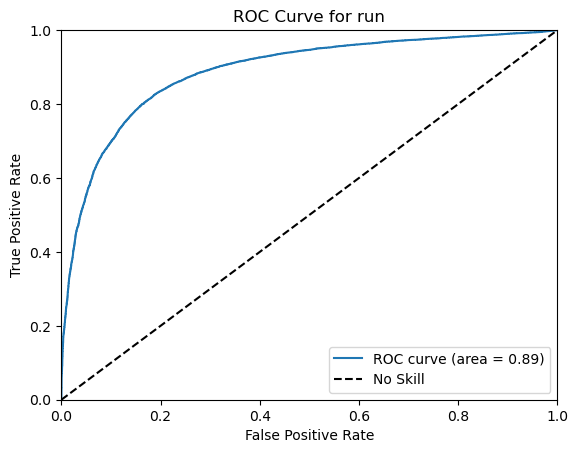

In [61]:
plt.figure()  
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for run')
plt.legend()
plt.show()

In [49]:
pred = model.predict(X_test)
print (f'Training Accuracy - : {model.score(X_train,y_train.astype(int))}')
print (f'Testing Accuracy - : {model.score(X_test,y_test.astype(int))}')

Training Accuracy - : 0.8126886356636895
Testing Accuracy - : 0.8184477979673545


In [50]:
cm_with_C_1 = confusion_matrix(pred, y_test.astype(int))


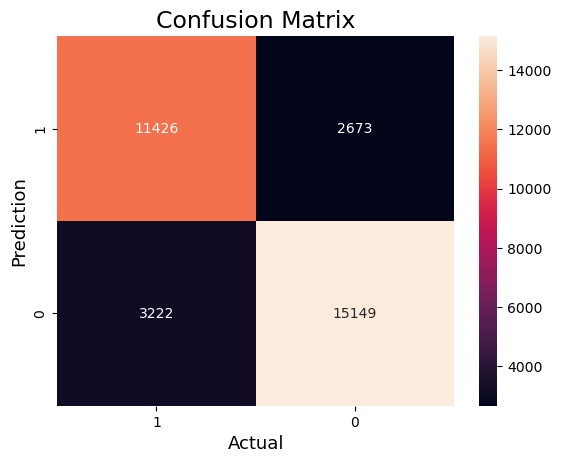

In [51]:
import seaborn as sns

sns.heatmap(cm_with_C_1,
            annot=True,
            fmt='g',
            xticklabels=['1', '0'],  # metastatic = 1, benign = 0
            yticklabels=['1', '0'])
plt.ylabel('Prediction', fontsize=13)
plt.xlabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17)
plt.show()

In [52]:
tp = cm_with_C_1[0][0]
fp = cm_with_C_1[0][1]
fn = cm_with_C_1[1][0]
tn = cm_with_C_1[1][1]

In [53]:
accuracy = (tp + tn) / np.sum(cm_with_C_1)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1 = 2 * (precision * recall) / (precision + recall)

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8184477979673545
Precision: 0.8104120859635435
Recall: 0.7800382304751502
F1 Score: 0.7949351236650781


In [54]:
youden_index = tpr - fpr


In [55]:
best_index = np.argmax(youden_index)


In [56]:
optimal_threshold = thresholds[best_index]

# Print the optimal threshold
print("Optimal cutoff threshold (Youden's Index):", optimal_threshold)

Optimal cutoff threshold (Youden's Index): 0.5560879253711651


##### Cut Off selection based on customized error function

In [76]:
cut_off = 0.82

In [77]:
# finding predicted class from pred_proba based on selected cut off
predicted_classes = (y_pred_proba >= cut_off).astype(int)

In [78]:
# building the confusion matrix
calculated_confusion_matrix = confusion_matrix(predicted_classes, y_test.astype(int))

In [66]:
calculated_confusion_matrix

array([[10240,  1889],
       [ 4408, 15933]], dtype=int64)

In [79]:
# storing the performace values
tp = calculated_confusion_matrix[0][0]
fp = calculated_confusion_matrix[0][1]
fn = calculated_confusion_matrix[1][0]
tn = calculated_confusion_matrix[1][1]

In [80]:
# calculating the customized error value
customized_error = 2 * fp + 1 * fn

In [72]:
cut_off_list = []
customized_error_list = []

In [81]:
cut_off_list.append(cut_off)
customized_error_list.append(customized_error)

In [88]:
print(cut_off_list)
print(customized_error_list)

[0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6000000000000001, 0.7000000000000001, 0.8, 0.9]
[14648, 11287, 9278, 8390, 8187, 8568, 9530, 11443, 14564, 21121]


In [96]:
cut_off_list = []
customized_error_list = []

In [97]:
for cut_off in np.arange(0.0, 1.0, 0.1):
    print(cut_off)

    # finding predicted class from pred_proba based on selected cut off
    predicted_classes = (y_pred_proba >= cut_off).astype(int)

    # building the confusion matrix
    calculated_confusion_matrix = confusion_matrix(predicted_classes, y_test.astype(int))

    # storing the performace values
    tp = calculated_confusion_matrix[0][0]
    fp = calculated_confusion_matrix[0][1]
    fn = calculated_confusion_matrix[1][0]
    tn = calculated_confusion_matrix[1][1]

    # calculating the customized error value
    customized_error = 6 * fp + 1 * fn

    # storing the necessary values
    cut_off_list.append(cut_off)
    customized_error_list.append(customized_error)

0.0
0.1
0.2
0.30000000000000004
0.4
0.5
0.6000000000000001
0.7000000000000001
0.8
0.9


In [98]:
best_cutoff_index = np.argmin(customized_error_list)  # identifying the location of the minimum error value
best_cutoff = cut_off_list[best_cutoff_index]
minimum_error = customized_error_list[best_cutoff_index]

In [99]:
print(best_cutoff_index)
print(best_cutoff)
print(minimum_error)

2
0.2
12962
